<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Preparation--" data-toc-modified-id="Data-Preparation---2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation  <a id="data_prep"></a></a></span></li><li><span><a href="#Exploratory-Data-Analysis--" data-toc-modified-id="Exploratory-Data-Analysis---3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis  <a id="eda"></a></a></span><ul class="toc-item"><li><span><a href="#Attrition" data-toc-modified-id="Attrition-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Attrition</a></span></li><li><span><a href="#Finding-Top-5-Important-Features" data-toc-modified-id="Finding-Top-5-Important-Features-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Finding Top 5 Important Features</a></span></li></ul></li><li><span><a href="#Visualization--" data-toc-modified-id="Visualization---4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualization  <a id="visualization"></a></a></span><ul class="toc-item"><li><span><a href="#OverTime" data-toc-modified-id="OverTime-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>OverTime</a></span></li><li><span><a href="#MonthlyIncome" data-toc-modified-id="MonthlyIncome-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>MonthlyIncome</a></span></li><li><span><a href="#JobRole" data-toc-modified-id="JobRole-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>JobRole</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#StockOptionLevel" data-toc-modified-id="StockOptionLevel-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>StockOptionLevel</a></span></li></ul></li><li><span><a href="#Splitting-Data--" data-toc-modified-id="Splitting-Data---5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Splitting Data  <a id="split_data"></a></a></span></li><li><span><a href="#Modeling--" data-toc-modified-id="Modeling---6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modeling  <a id="modeling"></a></a></span><ul class="toc-item"><li><span><a href="#CART" data-toc-modified-id="CART-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>CART</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Neural Network</a></span></li><li><span><a href="#Ensembling" data-toc-modified-id="Ensembling-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Ensembling</a></span></li></ul></li><li><span><a href="#Summary--" data-toc-modified-id="Summary---7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary  <a id="summarize"></a></a></span></li></ul></div>

# Employee Attrition Case Study

## Problem Statement

1. [Data Preparation](#data_prep)
    - Data Import (Target variable is “Attrition” column)
    - Identify columns which are of no use. drop those columns
    - Find top five important features contributing towards attrition.


2. [Exploratory Data Analysis](#eda)


3. [Visualization](#visualization)


4. [Split Data in Training and Testing samples](#split_data)


5. [Modeling](#modeling)
    - Build CART Model and validate CART Model on test data.

    - Build Neural Network Model validate NN model on test data.

    - Build Random Forest Model validate RF Model on test data.

    - Build Ensemble Model by combining CART, RF, NN models together.


6. [Summarize accuracy of all models built for prediction](#summarize)

## Data Preparation  <a id='data_prep'></a>

In [1]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [2]:
# Importing data
emp_raw <- read.csv("HR_Employee_Attrition_Data.csv")
emp <- data.frame(emp_raw)
head(emp)

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


In [3]:
head(emp[nearZeroVar(emp)])

EmployeeCount,Over18,StandardHours
1,Y,80
1,Y,80
1,Y,80
1,Y,80
1,Y,80
1,Y,80


Dropping the the columns with constant values or no variability.

- Drop Over18 as there is no variability, all are Y.
- Drop EmployeeCount as there is no variability, all are 1.
- Drop StandardHours as there is no variability, all are 80.
- Also, drop Employee Number as it is just an identifier.

In [4]:
emp$Over18 <- NULL
emp$EmployeeCount <- NULL
emp$StandardHours <- NULL
emp$EmployeeNumber <- NULL

There are multiple numeric variables that are actually factors, convert these to factors.

In [5]:
emp$Education <- as.factor(emp$Education)
emp$EnvironmentSatisfaction <- as.factor(emp$EnvironmentSatisfaction)
emp$JobInvolvement <- as.factor(emp$JobInvolvement)
emp$JobLevel <- as.factor(emp$JobLevel)
emp$JobSatisfaction <- as.factor(emp$JobSatisfaction)
emp$PerformanceRating <- as.factor(emp$PerformanceRating)
emp$RelationshipSatisfaction <- as.factor(emp$RelationshipSatisfaction)
emp$StockOptionLevel <- as.factor(emp$StockOptionLevel)
emp$TrainingTimesLastYear <- as.factor(emp$TrainingTimesLastYear)
emp$WorkLifeBalance <- as.factor(emp$WorkLifeBalance)

## Exploratory Data Analysis  <a id='eda'></a>

### Attrition

In [6]:
nrow(emp)

[1] 1470

In [7]:
table(emp$Attrition)


  No  Yes 
1233  237 

In [8]:
prop.table(table(emp$Attrition))


       No       Yes 
0.8387755 0.1612245 

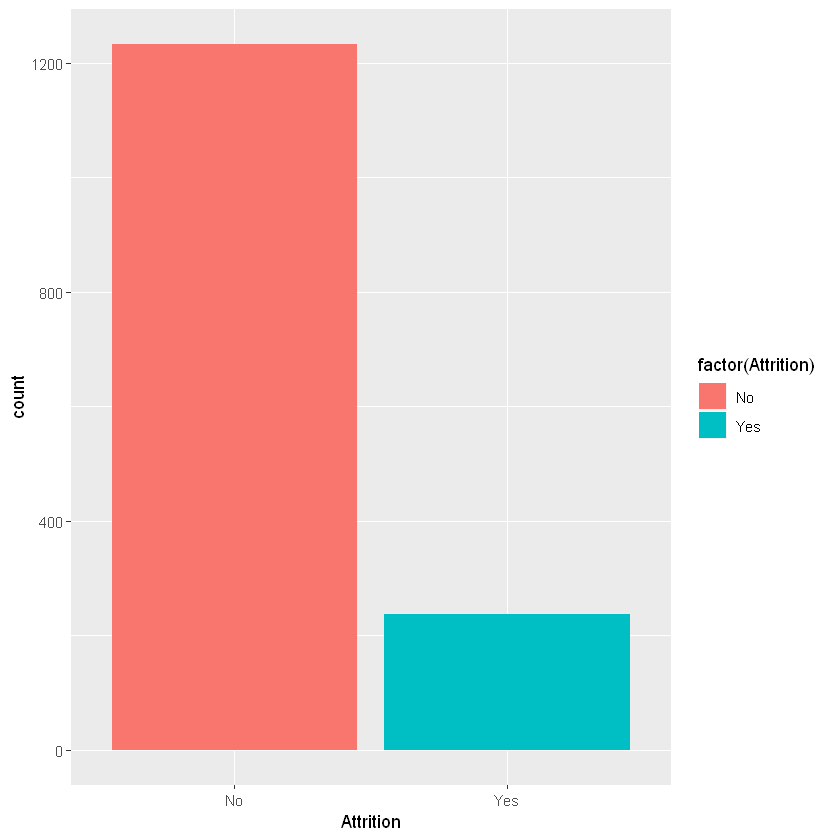

In [9]:
ggplot(emp, aes(Attrition, fill = factor(Attrition))) + geom_bar()

### Finding Top 5 Important Features

In [34]:
# https://machinelearningmastery.com/feature-selection-with-the-caret-r-package/

# ensure the results are repeatable
set.seed(1234)

# load the library
library(mlbench)
library(caret)

# define the control using a random forest selection function
control <- rfeControl(functions = rfFuncs, method = "cv", number = 10)

# run the RFE algorithm
results <- rfe(emp[, -2], emp[, 2], sizes = c(1:8), rfeControl = control)

# summarize the results
print(results)

# list the chosen features in sequence
predictors(results)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         1   0.8388 0.0000   0.002838 0.00000         
         2   0.8456 0.1346   0.007706 0.12043         
         3   0.8435 0.1374   0.013339 0.09134         
         4   0.8408 0.2425   0.020825 0.10350         
         5   0.8381 0.2235   0.014043 0.07712         
         6   0.8476 0.2774   0.023098 0.12570         
         7   0.8476 0.2810   0.013990 0.09225         
         8   0.8496 0.2746   0.013252 0.08005         
        30   0.8578 0.2183   0.011397 0.10915        *

The top 5 variables (out of 30):
   OverTime, MonthlyIncome, JobRole, Age, StockOptionLevel



[1] "OverTime"                 "MonthlyIncome"           
 [3] "JobRole"                  "Age"                     
 [5] "StockOptionLevel"         "JobLevel"                
 [7] "TotalWorkingYears"        "YearsAtCompany"          
 [9] "MaritalStatus"            "YearsWithCurrManager"    
[11] "YearsInCurrentRole"       "BusinessTravel"          
[13] "EnvironmentSatisfaction"  "WorkLifeBalance"         
[15] "JobSatisfaction"          "NumCompaniesWorked"      
[17] "JobInvolvement"           "Department"              
[19] "EducationField"           "YearsSinceLastPromotion" 
[21] "DistanceFromHome"         "RelationshipSatisfaction"
[23] "PercentSalaryHike"        "PerformanceRating"       
[25] "TrainingTimesLastYear"    "Gender"                  
[27] "DailyRate"                "HourlyRate"              
[29] "Education"                "MonthlyRate"

In [35]:
cat("Here top five features are determined by using Random Forest Method. These features are contributing most for Attrition and hence can be given prior attention.")
head(results$optVariables, 5)

Here top five features are determined by using Random Forest Method. These features are contributing most for Attrition and hence can be given prior attention.

[1] "OverTime"         "MonthlyIncome"    "JobRole"          "Age"             
[5] "StockOptionLevel"

In [12]:
rm(results) # To keep system performing well, removing environment variable as it is no longer needed.

## Visualization  <a id='visualization'></a>

### OverTime

The percentage of attrition amongst those putting in overtime is close to 54 %. Thus Overtime is contributing towards attrition significantly.

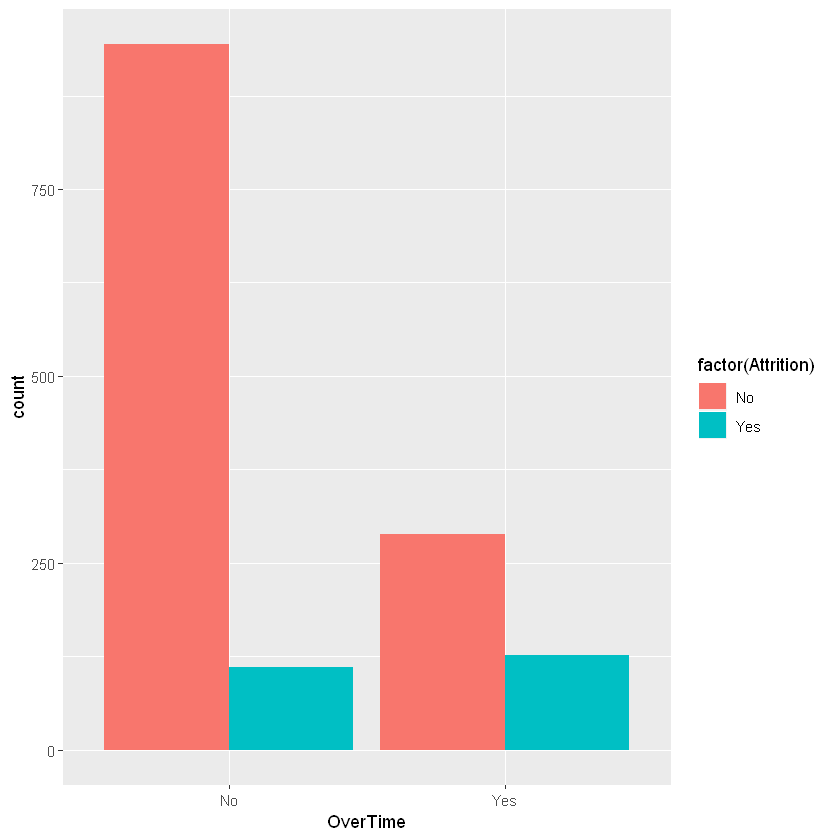

In [13]:
tempTable<-table(emp$OverTime, emp$Attrition)
attritionPercentage<-ceiling((tempTable[4]/(tempTable[3]+tempTable[4]))*100)
cat("The percentage of attrition amongst those putting in overtime is close to",attritionPercentage,"%. Thus Overtime is contributing towards attrition significantly.")

ggplot(emp, aes(OverTime, fill = factor(Attrition))) + geom_bar(position = "dodge")

### MonthlyIncome

The attrition in absolute terms decreases as the salary increases, thus lower salary is contributing towards attrition.

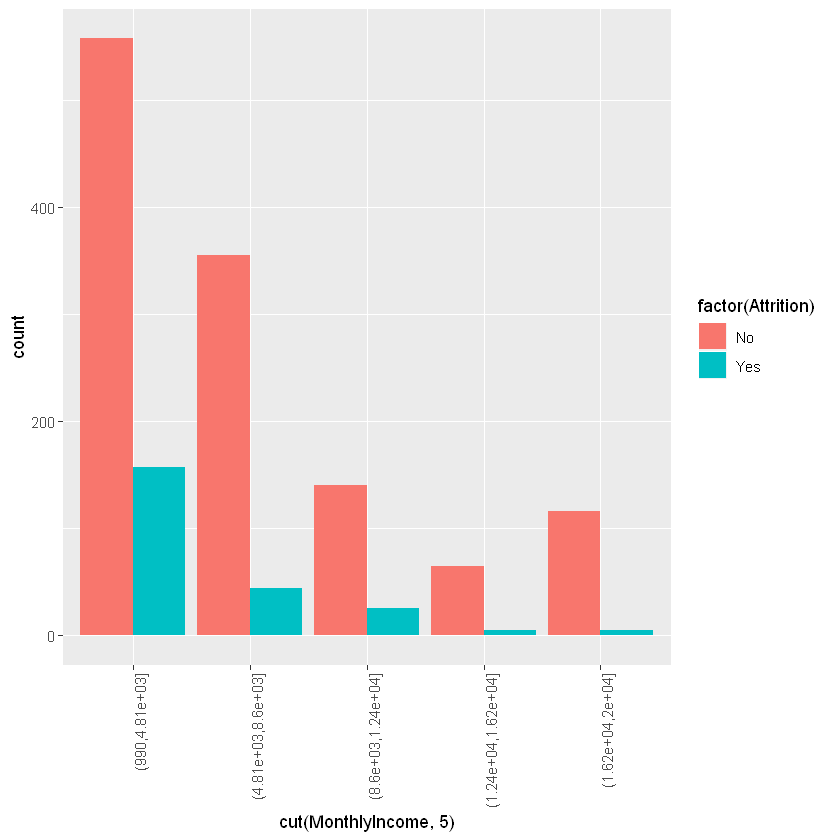

In [14]:
ggplot(emp, aes(cut(MonthlyIncome, 5), fill = factor(Attrition))) + geom_bar(position = "dodge") + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
cat("The attrition in absolute terms decreases as the salary increases, thus lower salary is contributing towards attrition.")

### JobRole

Sales Executive role is contributing the maximum towards attrition, followed by Research Scientist and Laboratory Technician.

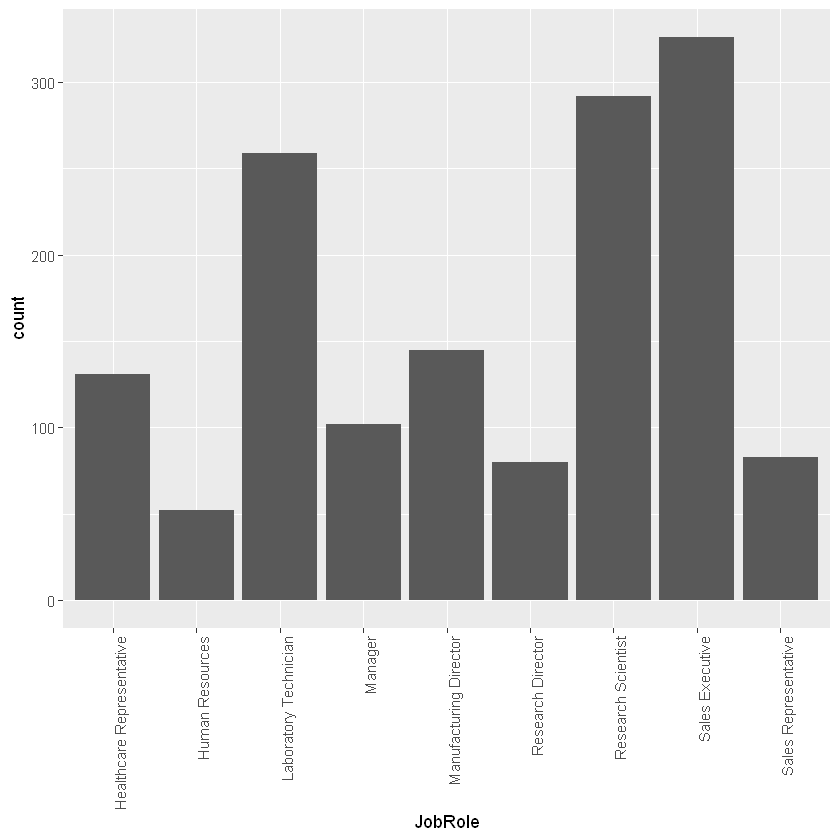

In [15]:
ggplot(emp, aes(JobRole), fill = factor(Attrition)) + geom_bar(position = "dodge") + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
cat("Sales Executive role is contributing the maximum towards attrition, followed by Research Scientist and Laboratory Technician.")

### Age

Post age of 32 year, attrition shows a downward trend.

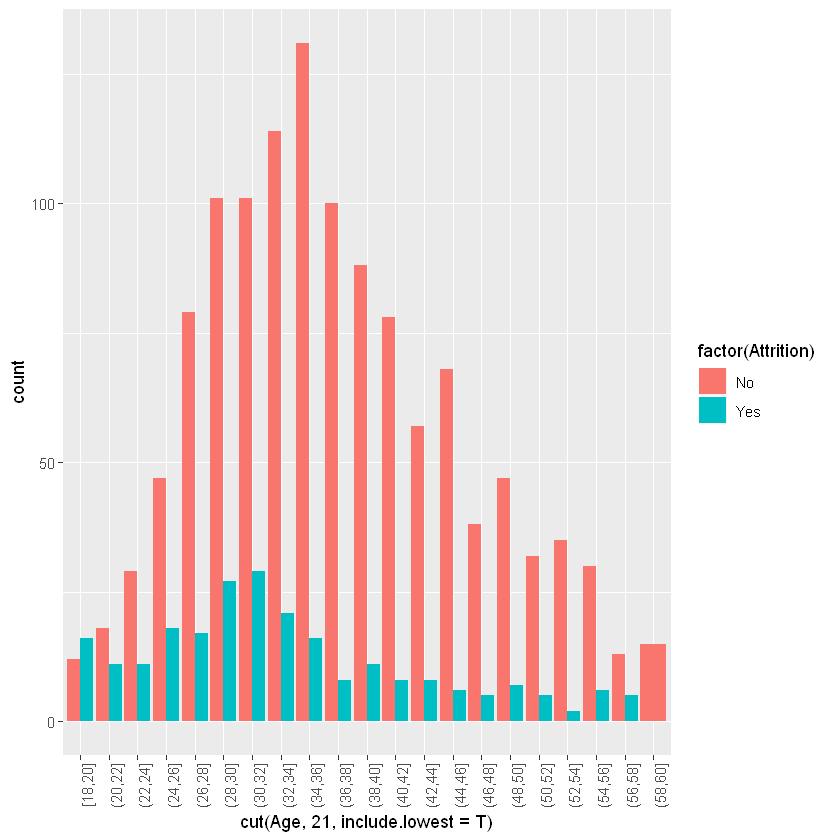

In [16]:
ggplot(emp, aes(cut(Age, 21, include.lowest = T), fill = factor(Attrition))) + geom_bar(position = "dodge") + theme(axis.text.x = element_text(angle = 90, hjust = 1))
cat("Post age of 32 year, attrition shows a downward trend.")

### StockOptionLevel

Larger proportions of Stock Option levels 1 & 2 contribute towards attrition.

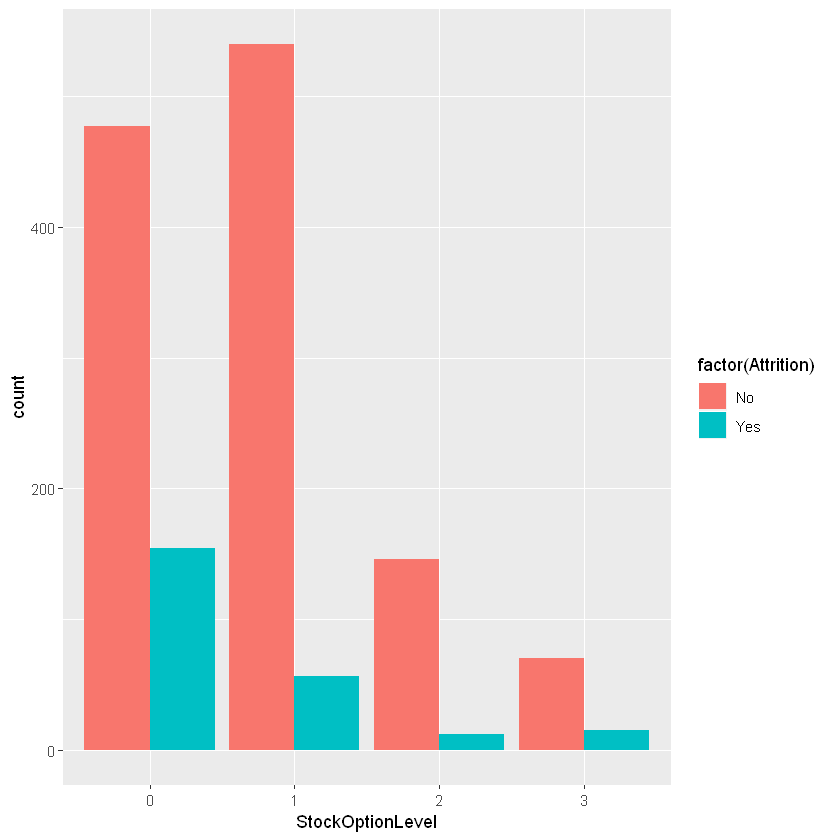

In [17]:
ggplot(emp, aes(StockOptionLevel, fill = factor(Attrition))) + geom_bar(position = "dodge")
cat("Larger proportions of Stock Option levels 1 & 2 contribute towards attrition.")

## Splitting Data  <a id='split_data'></a>

In [18]:
set.seed(1234)
library(caTools)

split = sample.split(emp$Attrition, SplitRatio = 0.7)

# Create training and testing sets
train = subset(emp, split == TRUE)
test = subset(emp, split == FALSE)

## Modeling  <a id='modeling'></a>

### CART

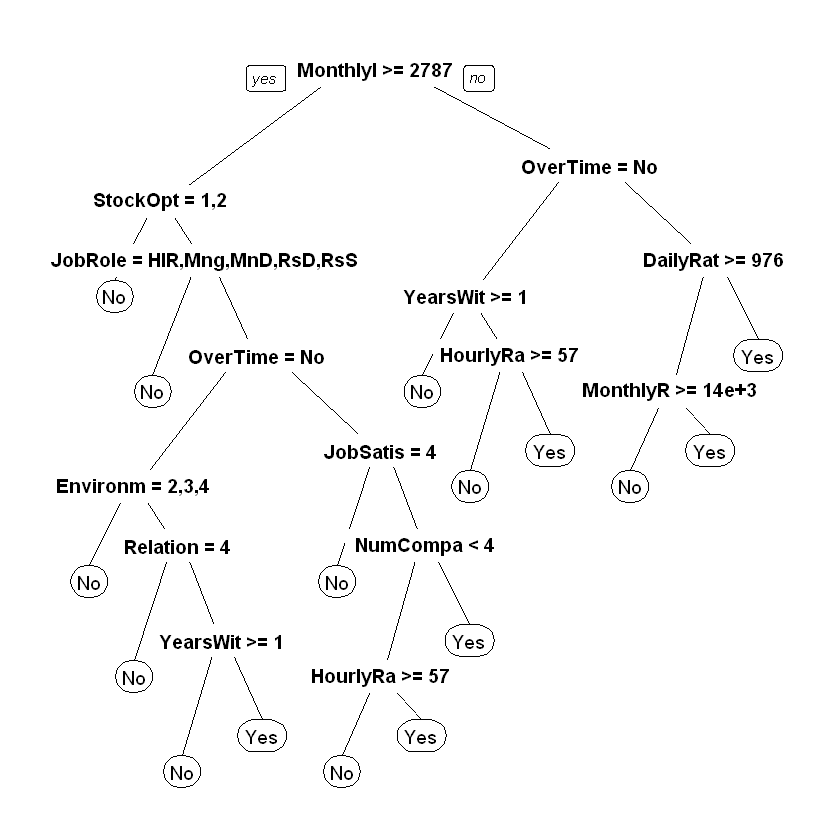

In [19]:
# Load CART packages
library(rpart)
library(rpart.plot)

modelCart = rpart(Attrition ~ ., data = train, method = "class")

# Plot the model
prp(modelCart)

In [20]:
# Predict the test data
predictionCart <- predict(modelCart, newdata = test, type = "class")

# CART Accuracy Confusion matrix
t1 <- table(test$Attrition, predictionCart)
t1

# CART model accuracy
result_CART <- (t1[1] + t1[4])/(nrow(test))
result_CART

     predictionCart
       No Yes
  No  350  20
  Yes  52  19

[1] 0.8367347

In [21]:
rm(modelCart) # To keep system performing well, removing environment variable as it is no longer needed.

### Random Forest

In [22]:
# Load Random Forest package
library(randomForest)

modelRf = randomForest(Attrition ~ ., data = train, ntree = 100, mtry = 5, importance = TRUE, 
    method = "class")

# Print the model
print(modelRf)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin




Call:
 randomForest(formula = Attrition ~ ., data = train, ntree = 100,      mtry = 5, importance = TRUE, method = "class") 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 5

        OOB estimate of  error rate: 14.29%
Confusion matrix:
     No Yes class.error
No  854   9  0.01042874
Yes 138  28  0.83132530


In [23]:
## List the importance of the variables.
impVar <- round(randomForest::importance(modelRf), 2)
impVar[order(impVar[, 3], decreasing = TRUE), ]

,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
OverTime,4.92,5.85,6.55,12.27
YearsAtCompany,3.96,0.62,4.73,10.79
Age,2.94,3.99,4.58,18.69
MonthlyIncome,3.56,2.31,4.52,20.76
YearsWithCurrManager,3.64,0.89,4.18,8.97
JobRole,3.82,2.03,4.16,13.55
TotalWorkingYears,2.80,2.10,3.93,14.08
YearsInCurrentRole,3.71,0.17,3.55,6.40
BusinessTravel,2.33,2.19,3.06,6.31
MaritalStatus,1.20,3.78,2.75,4.97


mtry = 10  OOB error = 14.77% 
Searching left ...
mtry = 2 	OOB error = 14.87% 
-0.006578947 0.001 
Searching right ...
mtry = 30 	OOB error = 15.35% 
-0.03947368 0.001 


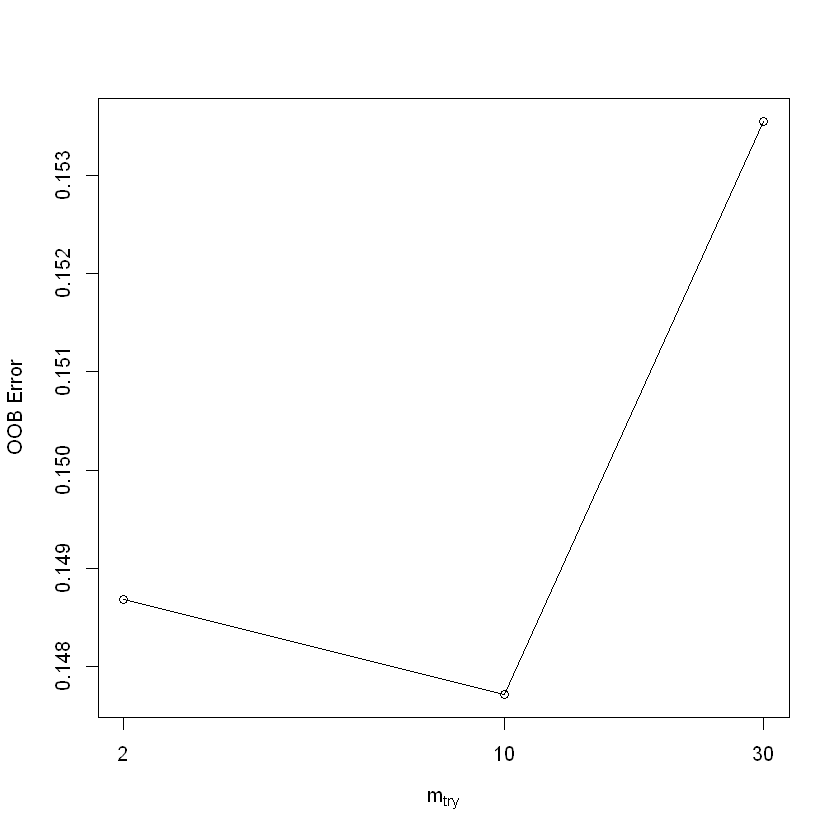

In [24]:
# Tuning Random Forest
tunedRf <- tuneRF(x = train[, -2], y = as.factor(train$Attrition), mtryStart = 10, 
    ntreeTry = 60, stepFactor = 5, improve = 0.001, trace = TRUE, plot = TRUE, doBest = TRUE, 
    nodesize = 5, importance = TRUE)

In [25]:
impvarTunedRf <- tunedRf$importance
impvarTunedRf[order(impvarTunedRf[, 3], decreasing = TRUE), ]

,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
OverTime,7.930639e-03,3.398424e-02,1.207003e-02,13.3545207
MonthlyIncome,9.803501e-03,2.188013e-02,1.168454e-02,19.9108814
Age,6.784437e-03,1.917304e-02,8.761606e-03,16.7395826
TotalWorkingYears,6.627185e-03,1.637770e-03,5.803171e-03,12.3618306
JobRole,5.440004e-03,6.557305e-03,5.592069e-03,13.0758930
JobLevel,4.098267e-03,6.682377e-03,4.531566e-03,5.0436822
YearsAtCompany,3.768119e-03,2.842132e-03,3.563592e-03,9.0173071
StockOptionLevel,1.508664e-03,8.962303e-03,2.673709e-03,7.5621328
BusinessTravel,1.874015e-03,6.956468e-03,2.663502e-03,5.8941707
TrainingTimesLastYear,1.786084e-03,3.881181e-03,2.121020e-03,10.9761123


In [26]:
predictionRf <- predict(tunedRf, test, type = "class")

# RandomForest Accuracy Confusion matrix
t2 <- table(test$Attrition, predictionRf)
t2

# RandomForest model accuracy
result_RF <- (t2[1] + t2[4])/(nrow(test))
result_RF

     predictionRf
       No Yes
  No  368   2
  Yes  61  10

[1] 0.8571429

In [27]:
rm(tunedRf, modelRf) # To keep system performing well, removing environment variable as it is no longer needed.

### Neural Network

In [28]:
## Using the NNet package(2 lines of code) No need to convert factors to
## numericals as in neuralnetwork package
library(nnet)
set.seed(1234)
modelNN <- nnet(Attrition ~ ., train, size = 20, decay = 0.0015, maxit = 2000, MaxNWts = 2000)

# weights:  1381
initial  value 1029.171959 
iter  10 value 441.441059
iter  20 value 436.136526
iter  30 value 433.936874
iter  40 value 431.309999
iter  50 value 430.688294
iter  60 value 429.836410
iter  70 value 429.678959
iter  80 value 429.516086
iter  90 value 429.232400
iter 100 value 428.282240
iter 110 value 425.025985
iter 120 value 424.488485
iter 130 value 422.402859
iter 140 value 421.744672
iter 150 value 421.451484
iter 160 value 420.813243
iter 170 value 419.458870
iter 180 value 419.316460
iter 190 value 418.923710
iter 200 value 418.522324
iter 210 value 418.300074
iter 220 value 418.279633
iter 230 value 418.250245
iter 240 value 418.130164
iter 250 value 417.967073
iter 260 value 417.911948
iter 270 value 417.795999
iter 280 value 417.784492
iter 290 value 417.726315
iter 300 value 417.502958
iter 310 value 416.903362
iter 320 value 416.447410
iter 330 value 416.341454
iter 340 value 415.990381
iter 350 value 415.941299
iter 360 value 415.769387
iter 370 value 415.

In [29]:
predictionNN <- predict(modelNN, test, type = ("class"))

# Counfusion Matrix
t3 <- table(test$Attrition, predictionNN)
t3

# NeuralNetwork model accuracy
result_NN <- (t3[1] + t3[4])/(nrow(test))
result_NN

     predictionNN
       No Yes
  No  369   1
  Yes  71   0

[1] 0.8367347

In [30]:
rm(modelNN) # To keep system performing well, removing environment variable as it is no longer needed.

### Ensembling

In [31]:
predictions <- data.frame(predictionCart = predictionCart, predictionRf = predictionRf, 
    predictionNN = predictionNN)

predictions$predictionEnsemble <- as.factor(
    ifelse(predictions$predictionCart == "Yes" & predictions$predictionRf == "Yes", "Yes",
    ifelse(predictions$predictionCart == "Yes" & predictions$predictionNN == "Yes", "Yes",
    ifelse(predictions$predictionRf == "Yes" & predictions$predictionNN == "Yes", "Yes", "No"))))

# Confusion Matrix
t4 <- table(test$Attrition, predictions$predictionEnsemble)
t4

# Ensembeling Accuracy
result_Ensembling <- (t4[1] + t4[4])/(nrow(test))
result_Ensembling

     
       No Yes
  No  369   1
  Yes  62   9

[1] 0.8571429

## Summary  <a id='summarize'></a>

In [32]:
cat("Here, from created models we have got the prediction accuracy as follows, it is suitable to choose simple and high accuracy model for predictions.\n \n\tCART =", 
    result_CART, "\n\tRandom Forest =", result_RF, "\n\tNeural Net =", result_NN, 
    "\n\tEnsembled Model =", result_Ensembling)

Here, from created models we have got the prediction accuracy as follows, it is suitable to choose simple and high accuracy model for predictions.
 
	CART = 0.8367347 
	Random Forest = 0.8571429 
	Neural Net = 0.8367347 
	Ensembled Model = 0.8571429